In [1]:
import sailboat as sb
%load_ext autoreload 
%autoreload 2
import cartopy.io.img_tiles as cimgt
request = cimgt.GoogleTiles(style='satellite')
#hide warnings
import warnings
warnings.filterwarnings('ignore')

# Initialize

## Get URL to retrieve data. 
URL is constructed using variable and date selction.

sb.gen_url(telemetry='min', BB3='min', CI='min', CT='min', O2='min', date_interval=None, limit=100)

Groups variables:
- Available groups to get: telemetry, BB3, CI, CT, O2

Groups variable Options:
- String 'min' (default for all): a selected sample of variables
- String 'all' : all available variables
- None : Group variables excluded

date_interval options:
- A tuple of the form ('2021-04-25', '2021-04-27')
- None (default). Date interval is ingnored and limit parameter is used instead

limit:
- Integer. Numeber of records when date_interval is not given. Default is 100

In [2]:
url, dates = sb.gen_url(limit=1000)
print(url)

Data variables are: ['GPSTimeStamp']
http://portal.navocean.com/services/nav.php?req=data&id=VELA&columns=GPSTimeStamp%2CLon%2CLat%2CTrack%2CHeading%2CBb%28470%29+%5BNTU%5D%2CBb%28532%29+%5BNTU%5D%2CBb%28650%29+%5BNTU%5D%2CCDOM+%5BQSU%5D%2CChl.+a+%5Bppb%5D%2CPhycocyanin+%5Bppb%5D%2CConductivity+%5BmS+cm-1%5D%2CTemperature+%5Bdeg+C%5D%2CO2+Concentration+%5Bmicromolar%5D&format=csv&output=file&limit=1000&token=5e5c4d86-3fd9-11eb-904e-06ad0ec96835


# Extract data
CSV is downoladed as a dataframe stored as df

sb.get_data(path, date_vars=['GPSTimeStamp'])

path: url ('string')

date_vars: variables that should be parsed as dates, there is a default if noting is chosen, but gen_url also extracts all names of date variables

In [3]:
df = sb.get_data(url, dates)
df

,GPSTimeStamp,Lon,Lat,Track,Heading,Conductivity [mS cm-1],Temperature [deg C],O2 Concentration [micromolar],Bb(470) [NTU],Bb(532) [NTU],Bb(650) [NTU],CDOM [QSU],Chl. a [ppb],Phycocyanin [ppb],local time
Id,,,,,,,,,,,,,,,
335953,2021-05-06 22:20:10,-80.933006,26.963385,72.1,70.9,0.435,29.782,257.00,19.134,16.753,21.834,159.53,14.41,3.02,2021-05-06 18:20:10-04:00
335952,2021-05-06 22:19:49,-80.932999,26.963331,336.1,341.5,0.434,29.785,255.93,19.376,16.753,21.349,159.68,14.53,2.82,2021-05-06 18:19:49-04:00
335951,2021-05-06 22:19:29,-80.932976,26.963301,358.4,16.1,0.435,29.789,257.26,19.134,16.753,21.591,158.72,14.35,3.65,2021-05-06 18:19:29-04:00
335950,2021-05-06 22:19:05,-80.933044,26.963280,122.3,68.8,0.435,29.789,257.26,19.134,16.753,21.591,158.72,14.35,3.65,2021-05-06 18:19:05-04:00
335949,2021-05-06 22:18:48,-80.933067,26.963284,26.9,46.1,0.435,29.789,257.26,19.134,16.753,21.591,158.72,14.35,3.65,2021-05-06 18:18:48-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334958,2021-05-06 15:24:33,-80.920128,26.982948,131.6,176.0,0.441,30.230,251.92,21.556,22.823,28.142,155.51,31.01,-4.07,2021-05-06 11:24:33-04:00
334957,2021-05-06 15:24:14,-80.920143,26.982960,271.4,245.7,0.440,30.221,250.86,19.134,16.996,23.532,155.01,24.90,9.58,2021-05-06 11:24:14-04:00
334956,2021-05-06 15:23:53,-80.920113,26.982952,172.7,275.6,0.440,30.221,250.86,19.134,16.996,23.532,155.01,24.90,9.58,2021-05-06 11:23:53-04:00


In [4]:
df.dtypes

GPSTimeStamp                                 datetime64[ns]
Lon                                                 float64
Lat                                                 float64
Track                                               float64
Heading                                             float64
Conductivity [mS cm-1]                              float64
Temperature [deg C]                                 float64
O2 Concentration [micromolar]                       float64
Bb(470) [NTU]                                       float64
Bb(532) [NTU]                                       float64
Bb(650) [NTU]                                       float64
CDOM [QSU]                                          float64
Chl. a [ppb]                                        float64
Phycocyanin [ppb]                                   float64
local time                       datetime64[ns, US/Eastern]
dtype: object

# Plotting

## Scatter plot
scatter(x_variable, y_variable, color='bb470',
        p_size=5, alpha=0.5, cmap = 'jet',
        xlim=None, ylim=None, vmin=0, vmax=200, ax = None)
        
x_variable, y_variable: strings corresponding to x and y variables in scatter plot

simplified variable names :
'time',
 'lon',
 'lat',
 'speed',
 'track',
 'heading',
 'pitch',
 'roll',
 'wind speed',
 'wind dir',
 'pressure',
 'air temp',
 'bb3 time',
 'bb470 counts',
 'bb532 counts',
 'bb650  counts',
 'bb470',
 'bb532',
 'bb650',
 'ci time',
 'chla counts',
 'cdom counts',
 'phyco counts',
 'chla',
 'cdom',
 'phyco',
 'ct time',
 'cond',
 'temp',
 'o2 time',
 'O2',
 'O2 sat',
 'O2 temp'
 
 color: 
 - variable name string (as above) to color markers with variable, or color name string, or None. Defaul is bb40
 
 Other variables are matplotlib kwargs:
 - p_size: integer, marquer size
 - alpha: float, transparency
 - cmap: colormap (matplotlib default strings or other cmap, default: 'jet')
 - xlim, ylim: tuples for x and y ax limits
 - vmin, vmax: limits for colorange 
 - ax: None or ax object.

In [15]:
import matplotlib.pyplot as plt

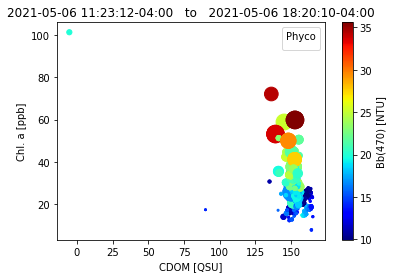

In [16]:
ax = sb.scatter(df, 'cdom', 'chla',
           s='Phycocyanin [ppb]', 
#            start_date='2021-04-25',
#            end_date='2021-05-01',
          )
handles, labels = ax.collections[0].legend_elements(prop="sizes", num=5, alpha=0.6)
ax.legend(handles, labels, loc="upper right", title="Phyco")

ax.set_title(str(df['local time'].iloc[-1]) + '   to   ' +str(df['local time'].iloc[0]))
plt.show()

In [14]:
sb.variable_to_column_name.keys()

dict_keys(['time', 'lon', 'lat', 'speed', 'track', 'heading', 'pitch', 'roll', 'wind speed', 'wind dir', 'pressure', 'air temp', 'bb3 time', 'bb470 counts', 'bb532 counts', 'bb650  counts', 'bb470', 'bb532', 'bb650', 'ci time', 'chla counts', 'cdom counts', 'phyco counts', 'chla', 'cdom', 'phyco', 'ct time', 'cond', 'temp', 'O2 time', 'O2', 'O2 sat', 'O2 temp'])

In [15]:
pc_ratio = sb.df['Phycocyanin [ppb]']/sb.df['Chl. a [ppb]']
sb.add_var('phyc/chla ratio', pc_ratio)

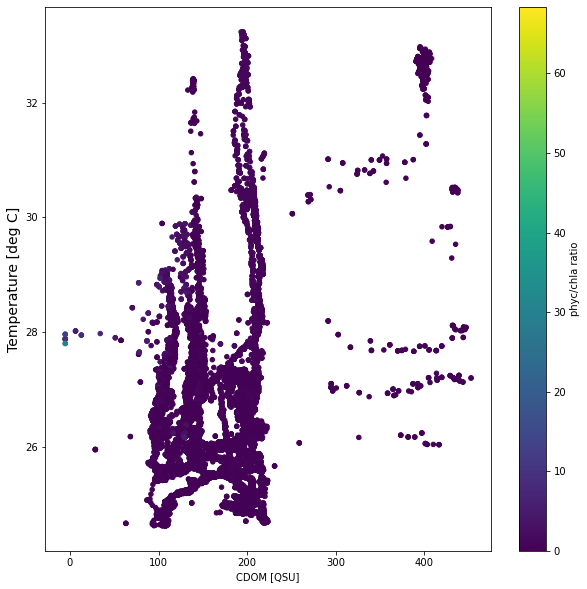

In [16]:

fig, ax = plt.subplots(figsize=(10,10))
sb.scatter('cdom', 'temp', z_var='phyc/chla ratio', cmap='viridis', vmin=0, ax=ax)

ax.yaxis.get_label().set_fontsize(14)
ax.yaxis.get_label().set_fontsize(14)
# plt.ylim(22, 32)

KeyError: 'phyc/chla ratio'

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


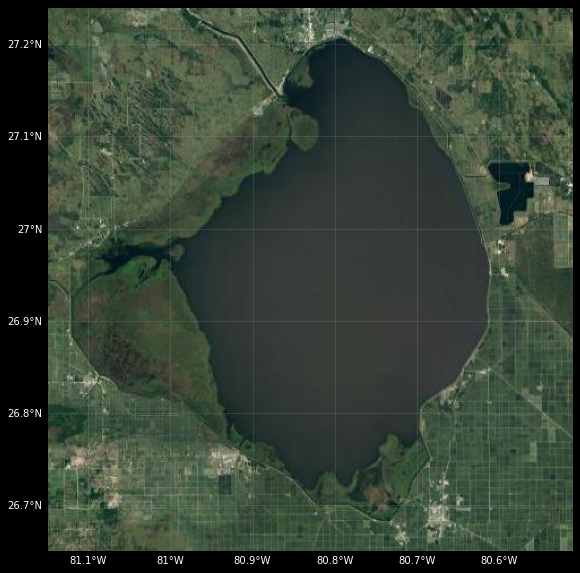

In [88]:
back_color='black'
fore_color='white'
plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=request.crs)
fig.patch.set_facecolor(back_color)

sb.background(extent = [-81.15, -80.51,26.65, 27.24], ax=ax, 
           request = request)
mapp = ax.scatter(sb.df['Lon'], sb.df['Lat'],
               c=sb.df['phyc/chla ratio'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
plt.colorbar(mapp, label='phyc/chla ratio')

In [26]:
from celluloid import Camera
from IPython.display import HTML

In [30]:
subset

,Id,GPSTimeStamp,Lon,Lat,Track,Heading,Conductivity [mS cm-1],Temperature [deg C],O2 Concentration [micromolar],Bb(470) [NTU],Bb(532) [NTU],Bb(650) [NTU],CDOM [QSU],Chl. a [ppb],Phycocyanin [ppb],local time,phyc/chla ratio
4101,322233,2021-04-30 20:23:49,-80.796432,27.222719,236.3,116.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-30 16:23:49-04:00,NaN
4102,322232,2021-04-30 20:23:28,-80.796432,27.222725,236.3,117.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-30 16:23:28-04:00,NaN
4103,322231,2021-04-30 20:23:08,-80.796440,27.222733,236.3,117.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-30 16:23:08-04:00,NaN
4104,322230,2021-04-30 20:21:39,-80.796432,27.222734,236.3,118.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-30 16:21:39-04:00,NaN
4105,322229,2021-04-30 20:21:19,-80.796425,27.222738,236.3,120.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-30 16:21:19-04:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,296298,2021-04-21 02:35:21,-80.728790,26.993706,128.1,127.1,0.398,25.447,219.88,57.159,55.844,76.419,97.88,9.78,4.15,2021-04-20 22:35:21-04:00,0.424335
29996,296297,2021-04-21 02:35:00,-80.728867,26.993767,129.0,137.8,0.398,25.447,219.88,57.159,55.844,76.419,97.88,9.78,4.15,2021-04-20 22:35:00-04:00,0.424335
29997,296296,2021-04-21 02:34:40,-80.728943,26.993830,122.0,120.1,0.399,25.444,220.04,56.917,55.359,75.691,98.13,9.01,5.18,2021-04-20 22:34:40-04:00,0.574917
29998,296295,2021-04-21 02:34:20,-80.729019,26.993896,137.0,138.5,0.399,25.444,220.04,56.917,55.359,75.691,98.13,9.01,5.18,2021-04-20 22:34:20-04:00,0.574917


/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


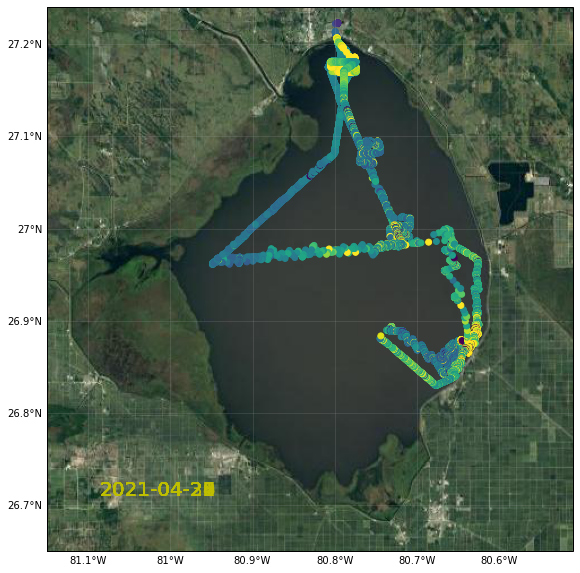

In [31]:
subset = sb.df[(sb.df['local time'].dt.year == 2021)&(sb.df['local time'].dt.month == 4)]

# request = cimgt.GoogleTiles(style='satellite')

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=request.crs)
camera = Camera(fig)

sb.background(ax=ax, request=request)
for d in range(21,31):
#     if d>1:
#         mpp.remove()
    day = subset[subset['local time'].dt.day == d]

    mpp = ax.scatter(day['Lon'], day['Lat'],
               c=day['phyc/chla ratio'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
    
    if day.shape[0]>0:
        date = day['local time'].iloc[0]
    else:
        date += timedelta(days=1)

    ax.text(.1, .1, str(date)[:-15], fontsize=20, c='y', transform=ax.transAxes)
    camera.snap()

In [32]:
anim = camera.animate(interval=1000)
anim.save('last.mp4')
HTML(anim.to_html5_video())

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


In [17]:
sb.plot_path('phyc/chla ratio', '2021-04-27', '2021-05-02', s=100,
            request=request)

AttributeError: 'list' object attribute 'append' is read-only

In [13]:
# Chl a (ppb or ug/L) vs. O2 (mg/L AND %sat)
 
# CDOM (QSU) vs. backscatter (NTU) at all 3 light wavelengths
 
# Chl a (ppb or ug/L) vs. CDOM (QSU)
 
# Chl a vs. Phycocyanin (ppb or ug/L)

In [36]:
import matplotlib as mpl
mpl.rcParams['text.color'] = 'cyan'

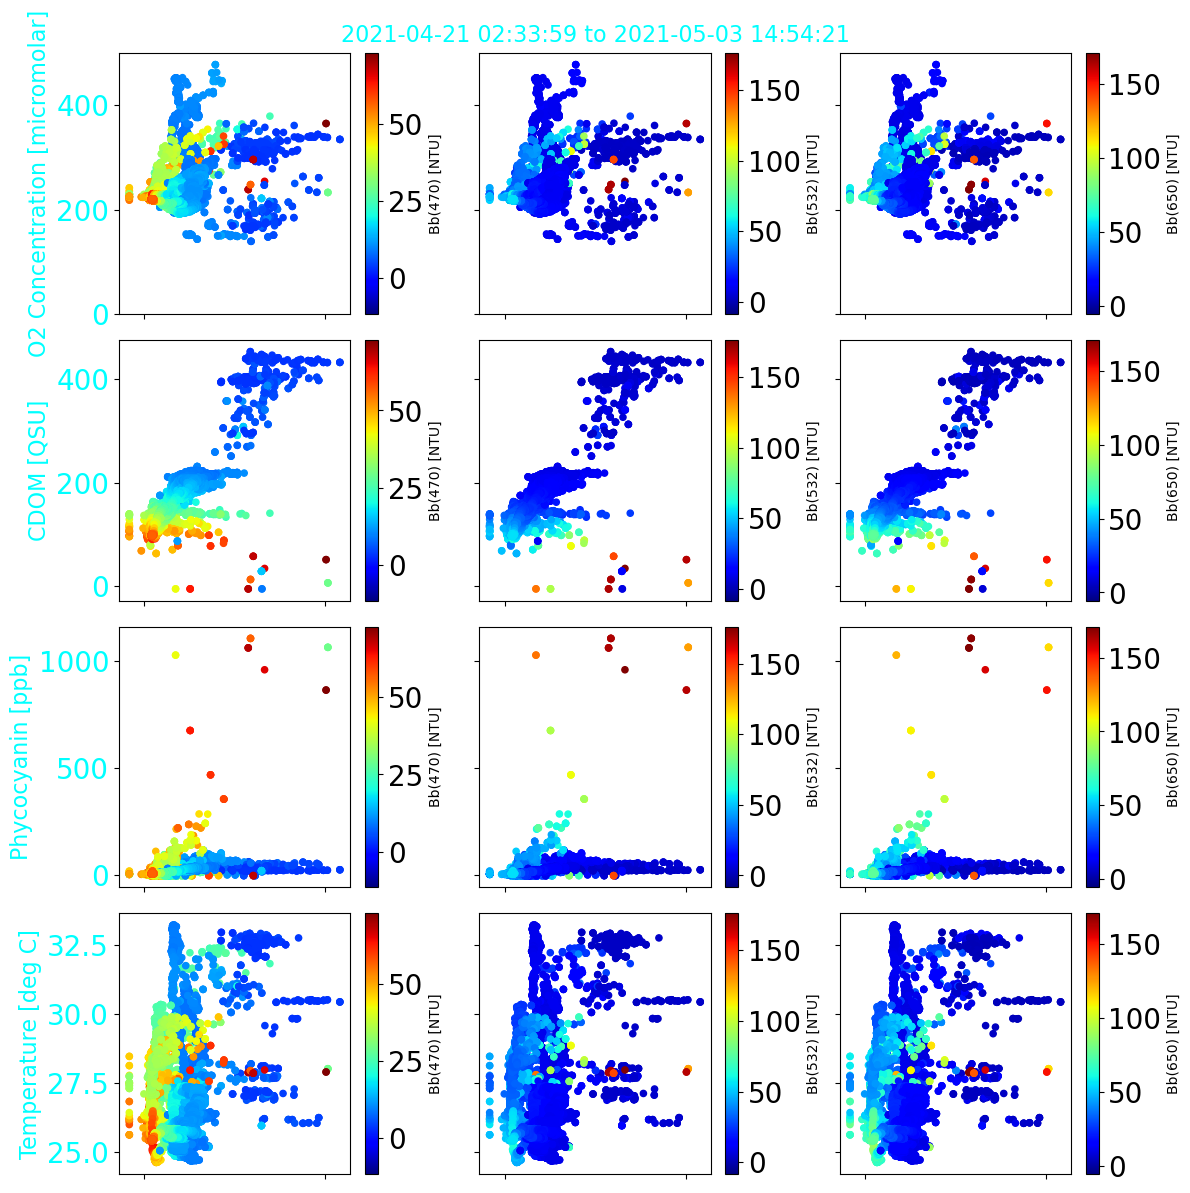

In [59]:
fig, axes = plt.subplots(4, 3, dpi=100, 
                         sharey='row', sharex=True,
                         figsize=(12,12))

y_vars = ['O2', 'cdom', 'phyco', 'temp']
c_vars = ['bb470', 'bb532', 'bb650']

for i, y_var in enumerate(y_vars):
    for j, c_var in enumerate(c_vars):
        sb.scatter('chla', y_var, z_var=c_var, ax = axes[i,j])
        axes[i,j].yaxis.get_label().set_fontsize(16)
#         axes[i,j].xaxis.get_label().set_fontsize(20)
        axes[i,j].yaxis.get_label().set_color('cyan')
        axes[i,j].xaxis.get_label().set_color('cyan')
        axes[i,j].tick_params(labelcolor='cyan')
        
#         if i!=3:
#             axes[i,j].set_xlabel('')
#         else:
#             axes[i,j].set_xlabel(sb.variable_to_column_name['chla'], fontsize=10)
fig.suptitle(str(sb.df['GPSTimeStamp'].iloc[-1])+' to '+ str(sb.df['GPSTimeStamp'].iloc[0]), fontsize=16)
fig.tight_layout()
axes[0, 1].set_ylim(0, 500)
ax.tick_params(labelcolor='cyan')
mpl.rcParams['text.color'] = 'cyan'
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 

In [50]:
sb.df['O2 Concentration [micromolar]'].loc[sb.df['O2 Concentration [micromolar]']>500] = np.nan

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


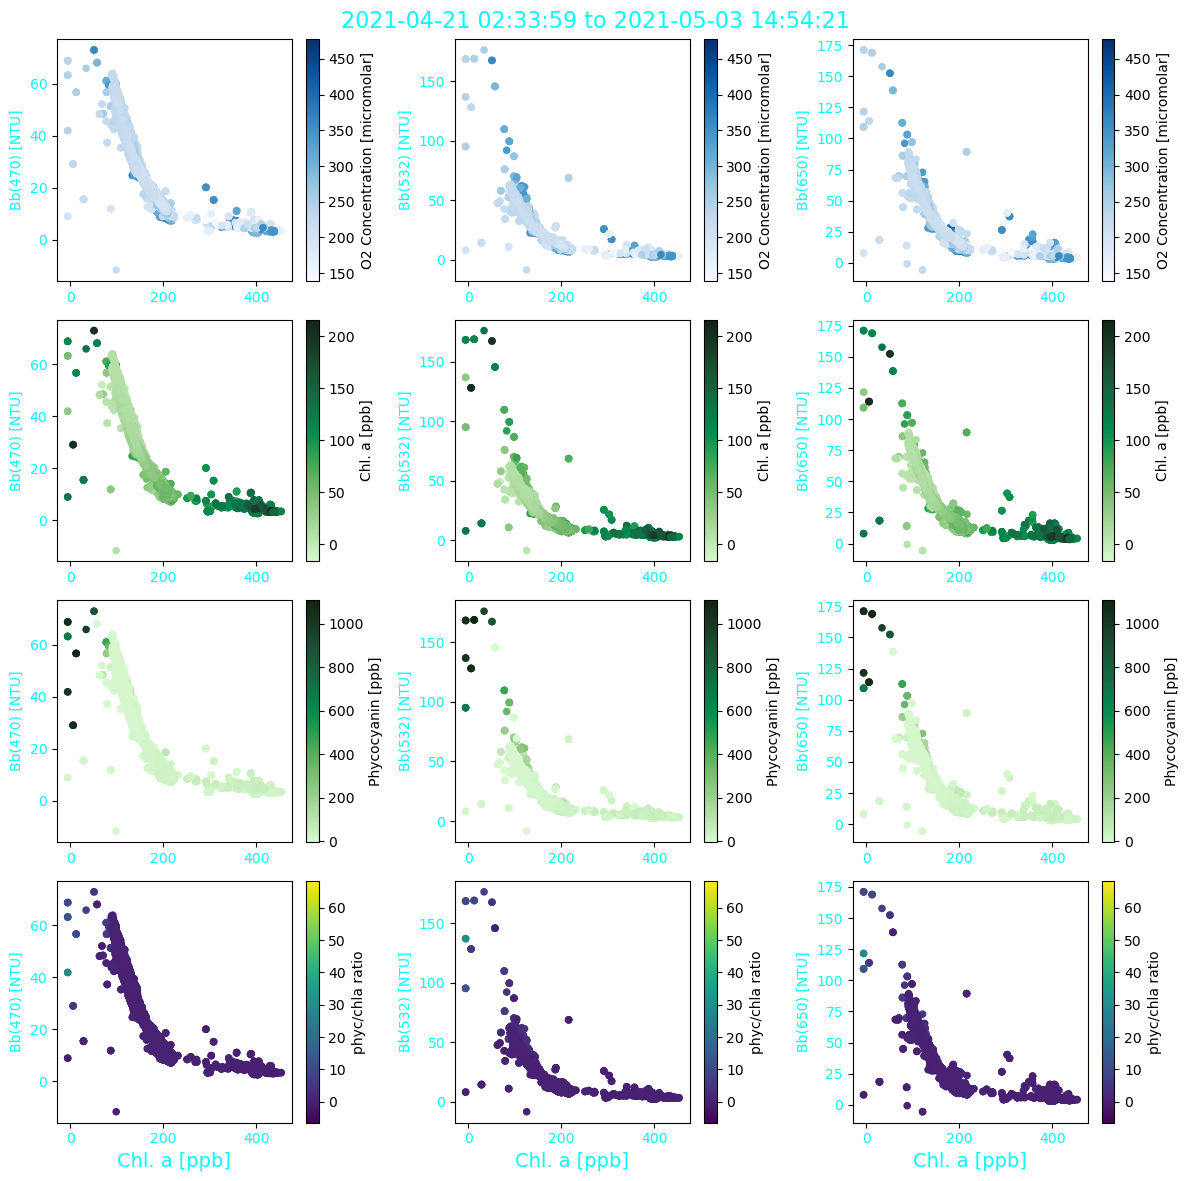

In [53]:
# CDOM (QSU) vs. backscatter (NTU) at all 3 light wavelengths

fig, axes = plt.subplots(4, 3, dpi=100, figsize=(12,12))

y_vars = ['bb470', 'bb532', 'bb650']
c_vars = ['O2', 'chla', 'phyco', 'phyc/chla ratio']
c_cmap = ['Blues', ccmo.algae, ccmo.algae, 'viridis']

for j, y_var in enumerate(y_vars):
    for i, c_var in enumerate(c_vars):
        var = sb.variable_to_column_name[c_var]
        vmin = sb.df[var].min()
        vmax = sb.df[var].max()
        sb.scatter('cdom', y_var, z_var=c_var, ax = axes[i,j],
                   vmin=vmin, vmax=vmax, cmap=c_cmap[i])
        if i!=3:
            axes[i,j].set_xlabel('')
        else:
            axes[i,j].set_xlabel(sb.variable_to_column_name['chla'], fontsize=14)
        axes[i,j].yaxis.get_label().set_color('cyan')
        axes[i,j].xaxis.get_label().set_color('cyan')
        axes[i,j].tick_params(labelcolor='cyan')
fig.suptitle(str(sb.df['GPSTimeStamp'].iloc[-1])+' to '+ str(sb.df['GPSTimeStamp'].iloc[0]), fontsize=16)
fig.tight_layout() 

Text(0.5, 1.0, '2021-04-29 08:16:37 to 2021-04-30 19:13:12')

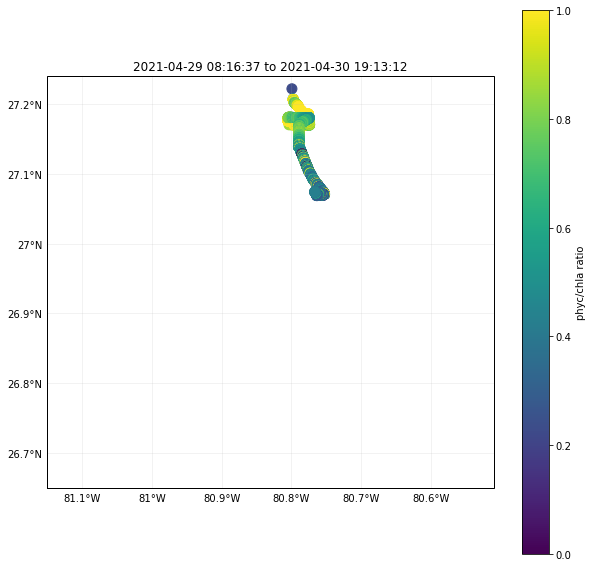

In [16]:
sb.plot_path('phyc/chla ratio', '2021-04-27', '2021-04-30',
             s=100, vmin=0, vmax=1)
plt.title(str(sb.df['GPSTimeStamp'].iloc[-1])+' to '+ str(sb.df['GPSTimeStamp'].iloc[0]))

In [17]:
files = glob.glob('./Data/*.csv')
local = Sailboat(path=files)

path to local file


In [18]:
local.get_data()
local.df

Dataframe loaded as df


,Id,GPSTimeStamp,Lon,Lat,O2 Concentration [micromolar],O2 Saturation [%],Bb(470) [NTU],Bb(532) [NTU],Bb(650) [NTU],CDOM [QSU],Chl. a [ppb],Phycocyanin [ppb],local time
0,102993,2020-12-30 23:59:28,-80.802025,27.217388,252.22,96.15,0.000,0.000,0.000,607.66,2189.17,1181.09,2020-12-31 03:59:28+04:00
1,102992,2020-12-30 23:59:19,-80.802025,27.217390,252.22,96.15,0.000,0.000,0.000,607.66,2189.17,1181.09,2020-12-31 03:59:19+04:00
2,102991,2020-12-30 23:59:06,-80.802017,27.217392,252.22,96.15,0.000,0.000,0.000,607.66,2189.17,1181.09,2020-12-31 03:59:06+04:00
3,102990,2020-12-30 23:58:54,-80.802017,27.217396,252.22,96.15,0.000,0.000,0.000,607.66,2189.17,1181.09,2020-12-31 03:58:54+04:00
4,102989,2020-12-30 23:58:48,-80.802017,27.217398,252.22,96.15,0.000,0.000,0.000,607.66,2189.17,1181.09,2020-12-31 03:58:48+04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215886,264814,2021-03-31 00:01:26,-80.743240,26.981470,240.30,94.44,27.853,26.465,33.236,157.28,21.65,5.23,2021-03-31 04:01:26+04:00
215887,264813,2021-03-31 00:01:06,-80.743393,26.981449,240.30,94.44,27.853,26.465,33.236,157.28,21.65,5.23,2021-03-31 04:01:06+04:00
215888,264812,2021-03-31 00:00:45,-80.743507,26.981367,240.29,94.41,28.095,26.708,33.721,156.05,20.92,5.79,2021-03-31 04:00:45+04:00
215889,264811,2021-03-31 00:00:25,-80.743607,26.981340,240.45,94.51,27.611,26.223,33.236,138.92,22.25,4.72,2021-03-31 04:00:25+04:00


In [25]:
from celluloid import Camera

from IPython.display import HTML

In [145]:
# str(day['GPSTimeStamp'].iloc[0])[:-9]
# day['GPSTimeStamp']
timedelta(days=1)

datetime.timedelta(days=1)

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


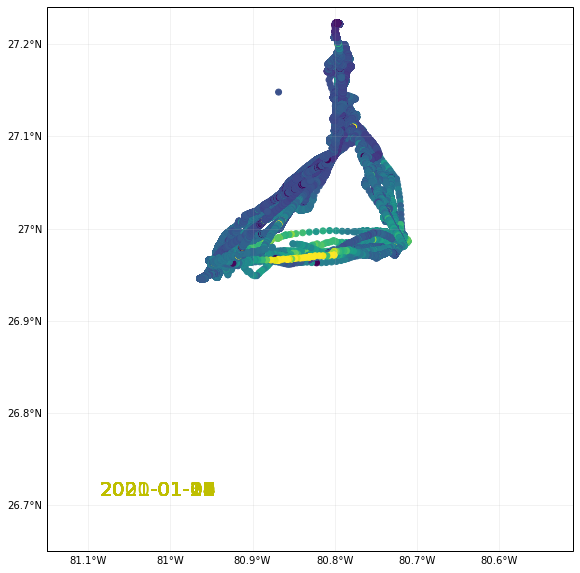

In [38]:
subset = local.df[local.df['local time'].dt.month == 1]

# request = cimgt.GoogleTiles(style='satellite')
request = cimgt.GoogleTiles(style='terrain')
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=request.crs)
camera = Camera(fig)

local.background(ax=ax, request=None, projection=request.crs)
for d in range(1,31):
#     if d>1:
#         mpp.remove()
    day = subset[subset['local time'].dt.day == d]

    mpp = ax.scatter(day['Lon'], day['Lat'],
               c=day['Phycocyanin [ppb]']/day['Chl. a [ppb]'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
    
    if day.shape[0]>0:
        date = day['GPSTimeStamp'].iloc[0]
    else:
        date += timedelta(days=1)

    ax.text(.1, .1, str(date)[:-9], fontsize=20, c='y', transform=ax.transAxes)
    camera.snap()


In [37]:
anim = camera.animate(interval=1000)
anim.save('Jan.mp4')
HTML(anim.to_html5_video())

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


In [11]:
# import cartopy.feature as cfeature
# from cartopy.io.img_tiles import Stamen
# def background(extent = [-81.15, -80.51,26.65, 27.24], ax=None, 
#               request = cimgt.GoogleTiles(style='satellite'),
#              out = False):
#     if request:
#         projection = request.crs
#         grid = True
#         image = request
#         zoom = 10
# #         features = False
#     else:
#         projection = ccrs.LambertConformal(central_longitude=-80.83, central_latitude=26.95,)
#         grid = False
#         image = Stamen(style='terrain-background)')
#         zoom = 10
# #         image = False
# #         features = True
        
#     if ax is None:
#         fig = plt.figure(figsize=(10, 10))
#         ax = plt.axes(projection=projection)

#     ax.set_extent(extent)
#     ax.add_image(image, zoom)    
# #     if features:
# #         ax.add_feature(cfeature.NaturalEarthFeature(category='raste',
# #                                                     name='natural_earth_1',
# #                                                     scale='10m'))
# # #         ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
# # #                                                     name='Lakes',
# # #                                                     scale='10m'))
# # #         ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
# # #                                                     name='rivers_lake_centerlines',
# # #                                                     scale='10m'))
      
#     if grid:
#         gl = ax.gridlines(draw_labels=True, alpha=0.2)
#         gl.xlabels_top = gl.ylabels_right = False
#         gl.xformatter = LONGITUDE_FORMATTER
#         gl.yformatter = LATITUDE_FORMATTER


#     if out is True:
#         return fig, ax
#     return fig, ax

In [114]:
anim = camera.animate()

In [116]:
HTML(anim.to_html5_video())

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


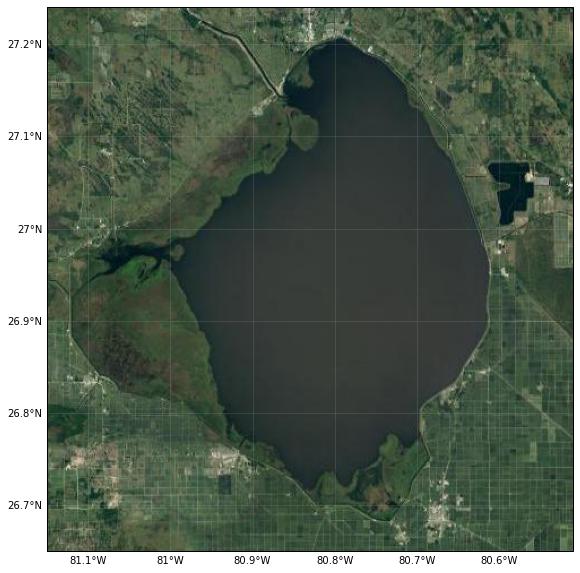

In [155]:
request = cimgt.GoogleTiles(style='satellite')
subset = frame[frame['local time'].dt.month == 1]
fig, ax = sb.background(out=True)
camera = Camera(fig)
markers = []
for index, row in subset[500:400].iterrows():
#     print(index)
    mrk = ax.scatter(row['Lon'], row['Lat'], c=row['Phycocyanin [ppb]']/row['Chl. a [ppb]'],
                              transform=ccrs.PlateCarree(),
                              vmin=0, vmax=2.)
#     markers.append(mrk)
#     if len(markers)>10 :
#         markers[0].remove()
#         del markers[0]
        
    camera.snap()

In [135]:
animation.save('animation.mp4')

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


AttributeError: 'NoneType' object has no attribute 'canvas'

In [165]:
day = subset[subset['local time'].dt.day == 1]
day

,GPSTimeStamp,Lon,Lat,O2 Concentration [micromolar],O2 Saturation [%],Bb(470) [NTU],Bb(532) [NTU],Bb(650) [NTU],CDOM [QSU],Chl. a [ppb],Phycocyanin [ppb],local time
Id,,,,,,,,,,,,
111027,2021-01-01 19:54:25,-80.879128,26.975124,0.0,0.0,31.971,35.206,-11.645,191.44,18.30,6.79,2021-01-01 23:54:25+04:00
111026,2021-01-01 19:44:17,-80.882141,26.974848,0.0,0.0,30.275,33.507,-11.645,196.09,19.63,6.97,2021-01-01 23:44:17+04:00
111025,2021-01-01 19:34:21,-80.885178,26.974648,0.0,0.0,29.306,32.293,-11.645,197.66,17.79,7.66,2021-01-01 23:34:21+04:00
111024,2021-01-01 19:24:21,-80.888000,26.974363,0.0,0.0,28.338,30.836,-11.645,201.56,17.88,7.37,2021-01-01 23:24:21+04:00
111023,2021-01-01 19:14:19,-80.890594,26.974052,0.0,0.0,27.853,30.593,-11.887,201.91,17.53,7.16,2021-01-01 23:14:19+04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
105092,2020-12-31 20:00:51,-80.797417,27.207148,0.0,0.0,18.892,21.124,-11.887,206.18,19.63,3.80,2021-01-01 00:00:51+04:00
105091,2020-12-31 20:00:42,-80.797417,27.207144,0.0,0.0,18.892,21.124,-11.887,206.18,19.63,3.80,2021-01-01 00:00:42+04:00
105090,2020-12-31 20:00:31,-80.797417,27.207148,0.0,0.0,18.892,21.124,-11.887,206.18,19.63,3.80,2021-01-01 00:00:31+04:00


In [162]:
anim = camera.animate()
HTML(anim.to_html5_video())

In [163]:
HTML(anim.to_html5_video())

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
